In [1]:
from model import ModelHandler
from DataLoader import DiagnosisEnd2End
import numpy as np
import tqdm
import torch
from Unet2 import UNET
from results_analysis import results
from ImageTransformations import otsu, mnorm


model = UNET(1, 1)
model.load_state_dict(torch.load("unet_segment.pth"))


def otsu_norm_transf(x): return otsu(mnorm(x, -680, 340))

## End2End Data

In [2]:
path_segmentation = "C:/Users/Usuario/Desktop/Uni/DataDaniMAPSIV/PSIV/02-Cancer_diagnosis/data/Diagnosis/"
nodules_path = "../data/Diagnosis/Radiolung_NoduleDiagnosis.csv"

In [3]:
diagonis = DiagnosisEnd2End(path_segmentation, nodules_path)

X_data_curated = np.zeros((49, 14, 64, 64))
y_data_curated = np.zeros(49)
i = 0

for idx in tqdm.tqdm(range(len(diagonis))):
    data = diagonis[idx]
    m = data['ROI'].shape[0]//2   
    X_data_curated[i] = otsu_norm_transf(model(torch.from_numpy(data["ROI"][m-7:m+7, :, :]).reshape((14, 1, 64, 64)).float()).detach().numpy().reshape((14, 64, 64)))
    y_data_curated[i] = data['GT'] if type(data['GT']) != type([]) else data['GT'][0]
    i+=1


  0%|          | 0/49 [00:00<?, ?it/s]

Len Dataloader: 49 // Actual index: 0 // Len diagnosis path 47 // Len anonymous nodules 49


  2%|▏         | 1/49 [00:03<02:41,  3.37s/it]

Len Dataloader: 49 // Actual index: 1 // Len diagnosis path 47 // Len anonymous nodules 49


  4%|▍         | 2/49 [00:09<03:41,  4.71s/it]

Len Dataloader: 49 // Actual index: 2 // Len diagnosis path 47 // Len anonymous nodules 49


  6%|▌         | 3/49 [00:15<04:18,  5.62s/it]

Len Dataloader: 49 // Actual index: 3 // Len diagnosis path 47 // Len anonymous nodules 49


  8%|▊         | 4/49 [00:21<04:08,  5.51s/it]

Len Dataloader: 49 // Actual index: 4 // Len diagnosis path 47 // Len anonymous nodules 49


 10%|█         | 5/49 [00:29<04:56,  6.74s/it]

Len Dataloader: 49 // Actual index: 5 // Len diagnosis path 47 // Len anonymous nodules 49


 12%|█▏        | 6/49 [00:34<04:12,  5.88s/it]

Len Dataloader: 49 // Actual index: 6 // Len diagnosis path 47 // Len anonymous nodules 49


 14%|█▍        | 7/49 [00:39<03:59,  5.71s/it]

Len Dataloader: 49 // Actual index: 7 // Len diagnosis path 47 // Len anonymous nodules 49


 16%|█▋        | 8/49 [00:42<03:17,  4.81s/it]

Len Dataloader: 49 // Actual index: 8 // Len diagnosis path 47 // Len anonymous nodules 49


 18%|█▊        | 9/49 [00:46<03:02,  4.57s/it]

Len Dataloader: 49 // Actual index: 9 // Len diagnosis path 47 // Len anonymous nodules 49


 20%|██        | 10/49 [00:51<03:05,  4.77s/it]

Len Dataloader: 49 // Actual index: 10 // Len diagnosis path 47 // Len anonymous nodules 49


 22%|██▏       | 11/49 [00:56<03:04,  4.86s/it]

Len Dataloader: 49 // Actual index: 11 // Len diagnosis path 47 // Len anonymous nodules 49


 24%|██▍       | 12/49 [01:01<02:58,  4.83s/it]

Len Dataloader: 49 // Actual index: 12 // Len diagnosis path 47 // Len anonymous nodules 49


 27%|██▋       | 13/49 [01:06<02:51,  4.76s/it]

Len Dataloader: 49 // Actual index: 13 // Len diagnosis path 47 // Len anonymous nodules 49


 29%|██▊       | 14/49 [01:09<02:34,  4.41s/it]

Len Dataloader: 49 // Actual index: 14 // Len diagnosis path 47 // Len anonymous nodules 49


 31%|███       | 15/49 [01:12<02:15,  4.00s/it]

Len Dataloader: 49 // Actual index: 15 // Len diagnosis path 47 // Len anonymous nodules 49


 33%|███▎      | 16/49 [01:15<02:02,  3.70s/it]

Len Dataloader: 49 // Actual index: 16 // Len diagnosis path 47 // Len anonymous nodules 49


 35%|███▍      | 17/49 [01:19<01:58,  3.71s/it]

Len Dataloader: 49 // Actual index: 17 // Len diagnosis path 47 // Len anonymous nodules 49


 37%|███▋      | 18/49 [01:22<01:51,  3.61s/it]

Len Dataloader: 49 // Actual index: 18 // Len diagnosis path 47 // Len anonymous nodules 49


 39%|███▉      | 19/49 [01:23<01:20,  2.70s/it]

Len Dataloader: 49 // Actual index: 19 // Len diagnosis path 47 // Len anonymous nodules 49


 41%|████      | 20/49 [01:27<01:33,  3.22s/it]

Len Dataloader: 49 // Actual index: 20 // Len diagnosis path 47 // Len anonymous nodules 49


 43%|████▎     | 21/49 [01:37<02:25,  5.18s/it]

Len Dataloader: 49 // Actual index: 21 // Len diagnosis path 47 // Len anonymous nodules 49


 45%|████▍     | 22/49 [01:41<02:08,  4.77s/it]

Len Dataloader: 49 // Actual index: 22 // Len diagnosis path 47 // Len anonymous nodules 49


 47%|████▋     | 23/49 [01:45<01:57,  4.51s/it]

Len Dataloader: 49 // Actual index: 23 // Len diagnosis path 47 // Len anonymous nodules 49


 49%|████▉     | 24/49 [01:48<01:44,  4.19s/it]

Len Dataloader: 49 // Actual index: 24 // Len diagnosis path 47 // Len anonymous nodules 49


 51%|█████     | 25/49 [01:52<01:36,  4.02s/it]

Len Dataloader: 49 // Actual index: 25 // Len diagnosis path 47 // Len anonymous nodules 49


 53%|█████▎    | 26/49 [01:56<01:32,  4.00s/it]

Len Dataloader: 49 // Actual index: 26 // Len diagnosis path 47 // Len anonymous nodules 49


 55%|█████▌    | 27/49 [01:56<01:05,  2.98s/it]

Len Dataloader: 49 // Actual index: 27 // Len diagnosis path 47 // Len anonymous nodules 49


 57%|█████▋    | 28/49 [02:00<01:07,  3.23s/it]

Len Dataloader: 49 // Actual index: 28 // Len diagnosis path 47 // Len anonymous nodules 49


 59%|█████▉    | 29/49 [02:05<01:11,  3.55s/it]

Len Dataloader: 49 // Actual index: 29 // Len diagnosis path 47 // Len anonymous nodules 49


 61%|██████    | 30/49 [02:09<01:14,  3.94s/it]

Len Dataloader: 49 // Actual index: 30 // Len diagnosis path 47 // Len anonymous nodules 49


 63%|██████▎   | 31/49 [02:16<01:23,  4.62s/it]

Len Dataloader: 49 // Actual index: 31 // Len diagnosis path 47 // Len anonymous nodules 49


 65%|██████▌   | 32/49 [02:20<01:15,  4.46s/it]

Len Dataloader: 49 // Actual index: 32 // Len diagnosis path 47 // Len anonymous nodules 49


 67%|██████▋   | 33/49 [02:24<01:09,  4.36s/it]

Len Dataloader: 49 // Actual index: 33 // Len diagnosis path 47 // Len anonymous nodules 49


 69%|██████▉   | 34/49 [02:25<00:51,  3.43s/it]

Len Dataloader: 49 // Actual index: 34 // Len diagnosis path 47 // Len anonymous nodules 49


 71%|███████▏  | 35/49 [02:29<00:49,  3.53s/it]

Len Dataloader: 49 // Actual index: 35 // Len diagnosis path 47 // Len anonymous nodules 49


 73%|███████▎  | 36/49 [02:33<00:47,  3.63s/it]

Len Dataloader: 49 // Actual index: 36 // Len diagnosis path 47 // Len anonymous nodules 49


 76%|███████▌  | 37/49 [02:33<00:32,  2.70s/it]

Len Dataloader: 49 // Actual index: 37 // Len diagnosis path 47 // Len anonymous nodules 49


 78%|███████▊  | 38/49 [02:35<00:24,  2.27s/it]

Len Dataloader: 49 // Actual index: 38 // Len diagnosis path 47 // Len anonymous nodules 49


 82%|████████▏ | 40/49 [02:35<00:11,  1.33s/it]

Len Dataloader: 49 // Actual index: 39 // Len diagnosis path 47 // Len anonymous nodules 49
Len Dataloader: 49 // Actual index: 40 // Len diagnosis path 47 // Len anonymous nodules 49


 84%|████████▎ | 41/49 [02:36<00:09,  1.23s/it]

Len Dataloader: 49 // Actual index: 41 // Len diagnosis path 47 // Len anonymous nodules 49


 86%|████████▌ | 42/49 [02:37<00:07,  1.10s/it]

Len Dataloader: 49 // Actual index: 42 // Len diagnosis path 47 // Len anonymous nodules 49


 88%|████████▊ | 43/49 [02:38<00:06,  1.07s/it]

Len Dataloader: 49 // Actual index: 43 // Len diagnosis path 47 // Len anonymous nodules 49


 90%|████████▉ | 44/49 [02:39<00:04,  1.21it/s]

Len Dataloader: 49 // Actual index: 44 // Len diagnosis path 47 // Len anonymous nodules 49


 92%|█████████▏| 45/49 [02:39<00:03,  1.21it/s]

Len Dataloader: 49 // Actual index: 45 // Len diagnosis path 47 // Len anonymous nodules 49


 94%|█████████▍| 46/49 [02:40<00:02,  1.13it/s]

Len Dataloader: 49 // Actual index: 46 // Len diagnosis path 47 // Len anonymous nodules 49


 96%|█████████▌| 47/49 [02:44<00:03,  1.79s/it]

Len Dataloader: 49 // Actual index: 47 // Len diagnosis path 47 // Len anonymous nodules 49


 98%|█████████▊| 48/49 [02:48<00:02,  2.25s/it]

Len Dataloader: 49 // Actual index: 48 // Len diagnosis path 47 // Len anonymous nodules 49


100%|██████████| 49/49 [02:50<00:00,  3.48s/it]


## SVM

In [4]:
svm = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'SVM', n_splits = 5)
svm.fit(True,True)

In [5]:
svm.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,C,kernel,mean,sem,ci,sort
10,"{'C': 10000.0, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e+04,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
13,"{'C': 10000000.0, 'kernel': 'poly'}",0.8,0.8,0.8,0.8,0.8,1.000000e+07,poly,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
2,"{'C': 0.01, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e-02,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
3,"{'C': 0.01, 'kernel': 'sigmoid'}",0.8,0.8,0.8,0.8,0.8,1.000000e-02,sigmoid,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
18,"{'C': 10000000000.0, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e+10,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4


findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.


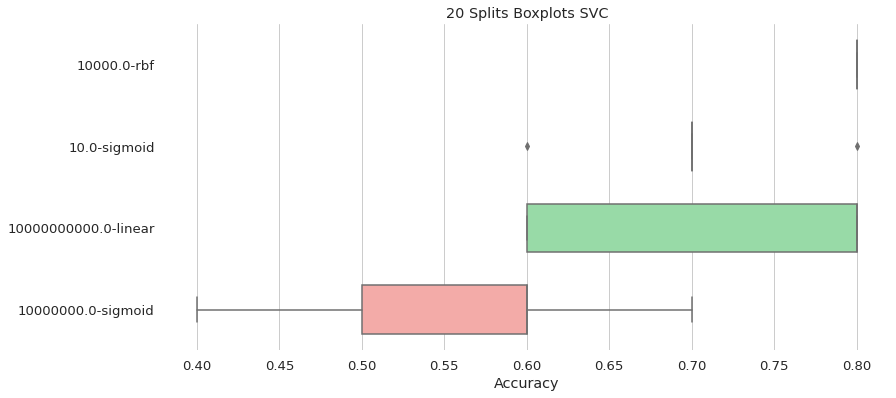

In [6]:
svm.boxplots(20)

In [7]:
results(X_data_curated,y_data_curated,'SVM', 5)

,tp,fp,tn,fn
split0,8,2,0,0
split1,9,1,0,0
split2,9,1,0,0
split3,7,3,0,0
split4,7,2,0,0


,accuracy,f1score,recall,precision
split0,0.800000,0.888889,1.0,0.800000
split1,0.900000,0.947368,1.0,0.900000
split2,0.900000,0.947368,1.0,0.900000
split3,0.700000,0.823529,1.0,0.700000
split4,0.777778,0.875000,1.0,0.777778


## KNN

In [8]:
knn = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'KNN', n_splits = 5)
knn.fit(True,True)

In [9]:
knn.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,algorithm,n_neighbors,p,mean,sem,ci,sort
31,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.8,0.8,0.8,0.8,0.8,brute,9,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
30,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1}",0.8,0.8,0.8,0.8,0.8,brute,9,1,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
22,"{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,9,1,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
21,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,7,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
15,"{'algorithm': 'ball_tree', 'n_neighbors': 9, '...",0.8,0.8,0.8,0.8,0.8,ball_tree,9,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4


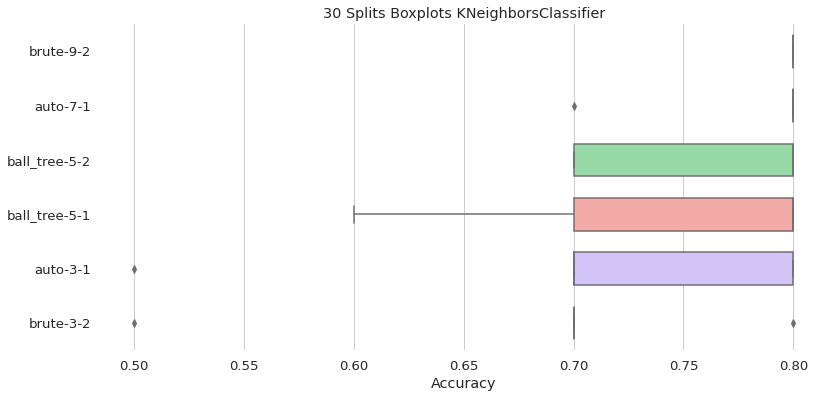

In [10]:
knn.boxplots(30)

In [12]:
results(X_data_curated,y_data_curated,'KNN', 5)

,tp,fp,tn,fn
split0,8,2,0,0
split1,9,1,0,0
split2,7,3,0,0
split3,9,1,0,0
split4,7,2,0,0


,accuracy,f1score,recall,precision
split0,0.800000,0.888889,1.0,0.800000
split1,0.900000,0.947368,1.0,0.900000
split2,0.700000,0.823529,1.0,0.700000
split3,0.900000,0.947368,1.0,0.900000
split4,0.777778,0.875000,1.0,0.777778


## Decision Tree

In [13]:
dt = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'DT', n_splits = 5)
dt.fit(True,True)

In [14]:
dt.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,criterion,max_features,splitter,mean,sem,ci,sort
10,"{'criterion': 'entropy', 'max_features': 'log2...",0.6,0.6,0.7,0.8,0.6,entropy,log2,best,0.66,0.04000,"(0.548942168027637, 0.7710578319723631)",0.274471
7,"{'criterion': 'entropy', 'max_features': 'auto...",0.5,0.6,0.7,0.7,0.8,entropy,auto,random,0.66,0.05099,"(0.5184284945373214, 0.8015715054626784)",0.259214
11,"{'criterion': 'entropy', 'max_features': 'log2...",0.6,0.5,0.8,0.7,0.7,entropy,log2,random,0.66,0.05099,"(0.5184284945373214, 0.8015715054626784)",0.259214
3,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.5,0.6,0.8,0.7,0.8,gini,sqrt,random,0.68,0.05831,"(0.5181067937646784, 0.8418932062353217)",0.259053
0,"{'criterion': 'gini', 'max_features': 'auto', ...",0.7,0.6,0.5,0.8,0.8,gini,auto,best,0.68,0.05831,"(0.5181067937646782, 0.8418932062353217)",0.259053


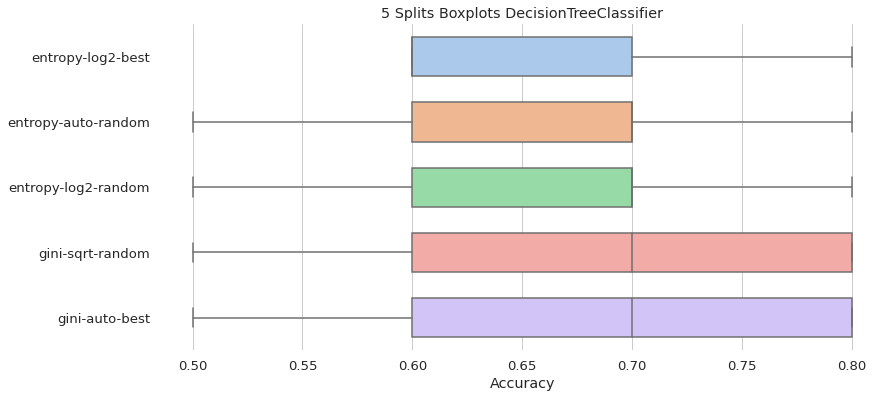

In [15]:
dt.boxplots(5)

In [16]:
results(X_data_curated,y_data_curated,'DT', 5)

,tp,fp,tn,fn
split0,5,1,1,3
split1,5,1,0,4
split2,6,1,0,3
split3,3,2,0,5
split4,5,3,0,1


,accuracy,f1score,recall,precision
split0,0.600000,0.714286,0.625000,0.833333
split1,0.500000,0.666667,0.555556,0.833333
split2,0.600000,0.750000,0.666667,0.857143
split3,0.300000,0.461538,0.375000,0.600000
split4,0.555556,0.714286,0.833333,0.625000
